Q1: Does higher rating movie also have a higher adjusted gross revenue?

In [6]:
# Load packages
install.packages('ggplot2')
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
# Load movie dataset
movie<-read.csv("/Users/Xuhuiz2/Desktop/movie.csv",header=TRUE)

# Explore the data
str(movie)
class(movie$IMDb_Rating)
class(movie$MovieLens_Rating)
class(movie$Adjusted_Gross)

'data.frame':	608 obs. of  18 variables:
 $ Day_of_Week     : Factor w/ 6 levels "Friday","Saturday",..: 1 1 1 1 1 1 4 1 1 1 ...
 $ Director        : Factor w/ 337 levels "Aaron Blaise, Robert A. Walker",..: 31 297 233 256 287 76 276 71 108 126 ...
 $ Genre           : Factor w/ 15 levels "action","adventure",..: 1 1 1 5 1 1 2 1 1 10 ...
 $ Movie_Title     : Factor w/ 608 levels "10,000 B.C.",..: 557 314 466 6 592 161 233 378 128 331 ...
 $ Release_Date    : Factor w/ 534 levels "1/10/2004","1/10/2010",..: 273 86 121 134 384 159 347 22 16 257 ...
 $ Studio          : Factor w/ 36 levels "Art House Studios",..: 2 2 11 25 25 25 2 31 31 20 ...
 $ Adjusted_Gross  : Factor w/ 585 levels "1,003","1,020",..: 50 51 52 53 54 55 56 57 58 59 ...
 $ Budget          : num  170 66 100 42 150 80 50 85 70 5 ...
 $ Gross_rev       : Factor w/ 561 levels "1,004.60","1,017",..: 30 33 43 27 40 59 63 49 72 45 ...
 $ IMDb_Rating     : num  6.7 6.6 6.1 7.2 8 5.8 6 6.8 6.3 5.9 ...
 $ MovieLens_Rating: num  3.

[1] "numeric"

[1] "numeric"

[1] "factor"

In [8]:
# Convert the Adj Gross revenue from factor into numeric, while getting rid of the commas to avoid NA's
movie$Adjusted_Gross2 <- as.numeric(gsub(",", "", as.character(movie$Adjusted_Gross)))

class(movie$Adjusted_Gross2)   ### We successfully changed this to numeric
factor(movie$Adjusted_Gross2)  ### Confirmed no NA's for values above 999

[1] "numeric"

[1] 202.1  204.2  207.1  208.8  209.7  212.8  213.9  215.5  216.5  218.8 
 [11] 219.9  221    221.2  221.6  223.1  223.4  223.7  223.8  223.9  226.1 
 [21] 227.2  227.6  228.6  229    231    231    232.3  232.5  233.4  233.7 
 [31] 234.7  234.8  235.2  236.1  237.3  239.9  240.6  240.8  241.8  241.9 
 [41] 242.3  242.9  243.4  243.8  244.3  244.5  244.9  245.3  245.4  245.9 
 [51] 246    246.5  247    248.8  248.9  251.3  251.4  252.1  252.8  254.3 
 [61] 254.8  256.3  256.4  256.5  257.5  257.8  258.9  259.5  259.8  262.4 
 [71] 263.2  263.5  265.5  265.9  266.6  267.3  268.1  268.4  269    269.2 
 [81] 269.4  269.4  269.5  270.7  272    272.9  273.1  274    274    274.1 
 [91] 274.2  275    275.2  275.6  276.2  276.5  276.9  278.4  279.3  280   
[101] 280    280.4  281.2  281.8  282.9  284.8  285.1  285.2  285.6  286   
[111] 286.4  286.6  288.5  289.5  290    290.9  292.1  292.2  293.7  294.2 
[121] 294.3  294.3  294.8  295.1  295.1  296    296    296    297.3  297.9 
[131] 298    298.2  299.1  299.4  302.6  303.2  303.5  304.9  305.5  305.7 
[141] 306.4  308.6  308.6  310.4  311    311.6  313.8  314.4  316.2  316.3 
[151] 316.4  316.8  317    317.2  317.4  317.9  318.9  319.1  320.1  321.1 
[161] 321.5  323    323.2  323.6  324.6  324.6  325.8  327.6  328.2  328.3 
[171] 329.5  329.9  330.2  330.5  331.4  331.5  331.9  332.8  334.4  334.7 
[181] 335    335.2  335.3  336.2  338.8  339.1  340.2  340.4  341.8  342.3 
[191] 342.4  342.6  342.7  343.2  343.4  344.7  346.4  347.3  347.3  348.7 
[201] 349.2  350.8  351.1  351.6  351.8  352.9  353.2  353.9  354.7  354.9 
[211] 356.4  356.4  356.6  357.1  358.3  358.6  359    359    359.2  360.6 
[221] 361    361.3  362    362.3  362.3  363.2  363.4  364    364.2  364.4 
[231] 364.7  364.8  365.2  365.6  365.9  365.9  366.7  366.9  367.2  367.5 
[241] 367.5  367.7  368.8  368.9  369.5  369.8  370.9  371.2  372.2  373.8 
[251] 374.4  374.9  375.3  377.1  378    378.5  382.1  382.8  383.5  383.9 
[261] 385.3  385.3  386.2  387.1  389.6  390.6  391    391.6  391.8  392.2 
[271] 392.6  394.3  395.4  396.3  396.5  396.8  400.2  402.4  402.6  403.8 
[281] 405.2  405.6  409.2  409.4  410.1  410.8  411.7  412.2  412.3  413.1 
[291] 413.6  414.5  414.7  415.3  415.9  416.4  417.4  417.8  419.6  419.7 
[301] 421    422.1  422.9  424.9  427    427.1  427.5  428.4  433.6  435.4 
[311] 436.3  436.7  437.1  437.1  437.5  438.7  439.9  440.6  441.2  441.8 
[321] 443    443.5  444    444.7  444.9  445.3  448    448.2  448.5  449.2 
[331] 451    451.7  452.2  452.4  453.3  453.3  453.9  455.6  456.6  457.6 
[341] 457.9  458.7  459.8  461    461.3  462.4  463.6  465.4  465.5  466.3 
[351] 467    469.1  469.4  470.9  472.3  473.8  475    475.4  476.1  476.6 
[361] 477.1  481.6  483.1  486.1  486.4  487.2  487.4  487.7  488.1  491.2 
[371] 493    493.4  495.2  502.5  503.6  507.9  508    508.6  509.4  509.9 
[381] 510.7  512.3  516.4  516.6  518.2  519.4  523.2  524.7  525.1  525.4 
[391] 526.9  528.8  530.2  531.1  537.9  538.6  539    539.6  539.7  539.7 
[401] 540.1  541.9  545    545.3  548.1  549.6  549.6  551.2  552.3  552.9 
[411] 554.3  558.3  558.5  560.1  562.3  564.2  564.9  569    569.6  569.7 
[421] 571    571.3  575.8  576.6  577.1  578.4  580.5  580.8  581.4  582.3 
[431] 584    586.7  590.4  591.9  592.3  593.3  595.9  598.2  599.4  603.2 
[441] 604.7  605.2  607.1  608    608.5  620.4  621.7  626.2  626.3  628   
[451] 630.8  631.9  632.1  636.7  639.8  645.4  646.3  646.4  647.4  648.6 
[461] 650.3  650.4  655    658.2  661.6  661.9  663    663.9  664.1  667   
[471] 670.1  670.3  671.4  673.5  675.7  675.7  680.4  681.8  681.9  685.2 
[481] 688.8  689.7  692.3  696.6  697.7  702.9  703.8  706.6  712    712.1 
[491] 712.2  713.2  715.5  715.9  718    720.5  724.2  726.3  731.3  734.4 
[501] 742    749.5  751.5  752.9  754.6  755.5  755.7  759.1  761.8  761.8 
[511] 762.4  770.3  771.8  773.6  774.2  777.7  779.6  785    786.8  788.8 
[521] 794.9  805.1  807.8  810.6  814.1  820.8  84

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

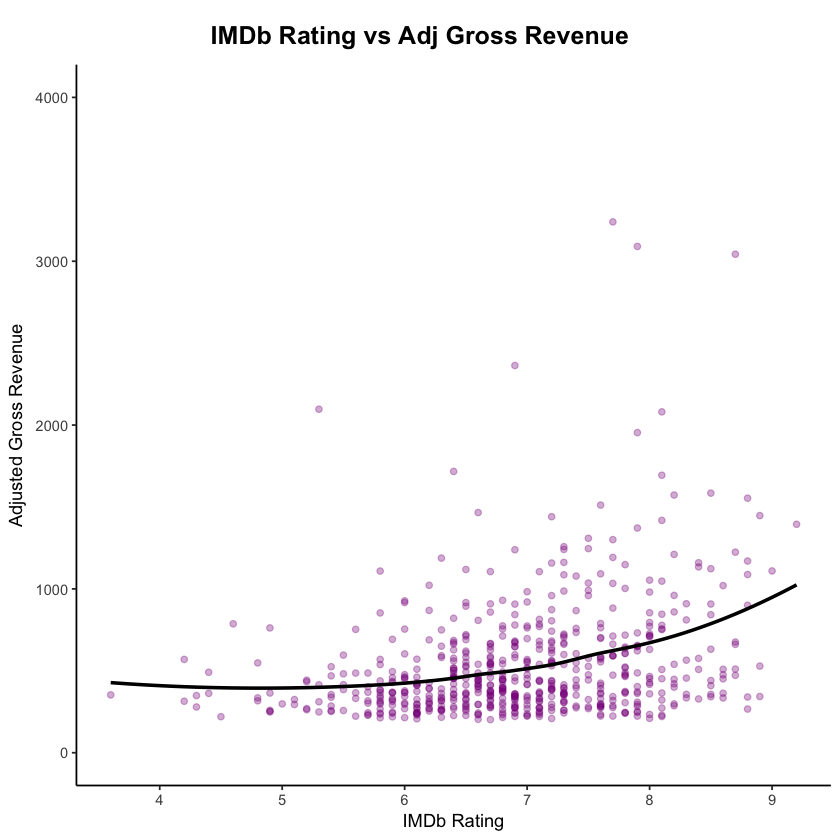

In [10]:
# Plot a scatterplot, add a trendline
#IMDB vs Adj Gross Rev
g<- ggplot(data=movie, aes(x=IMDb_Rating, y=Adjusted_Gross2)) + 
  geom_point(alpha=1/3,color='dark magenta') + geom_smooth(fill=NA,color='black',size=1) +
  xlab("IMDb Rating") + ylab("Adjusted Gross Revenue") +
  labs(title = "IMDb Rating vs Adj Gross Revenue") +
  scale_x_continuous(breaks = round(seq(0,10, by = 1),1)) +
  ylim(0,4000) 

g+ theme(panel.background = element_rect(fill='white'),
        plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
        axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_line(colour='white'),
        panel.border = element_blank()) 

In [11]:
# Assess the correlation
cor(movie$IMDb_Rating,movie$Adjusted_Gross2,method="pearson")

[1] 0.2720711

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

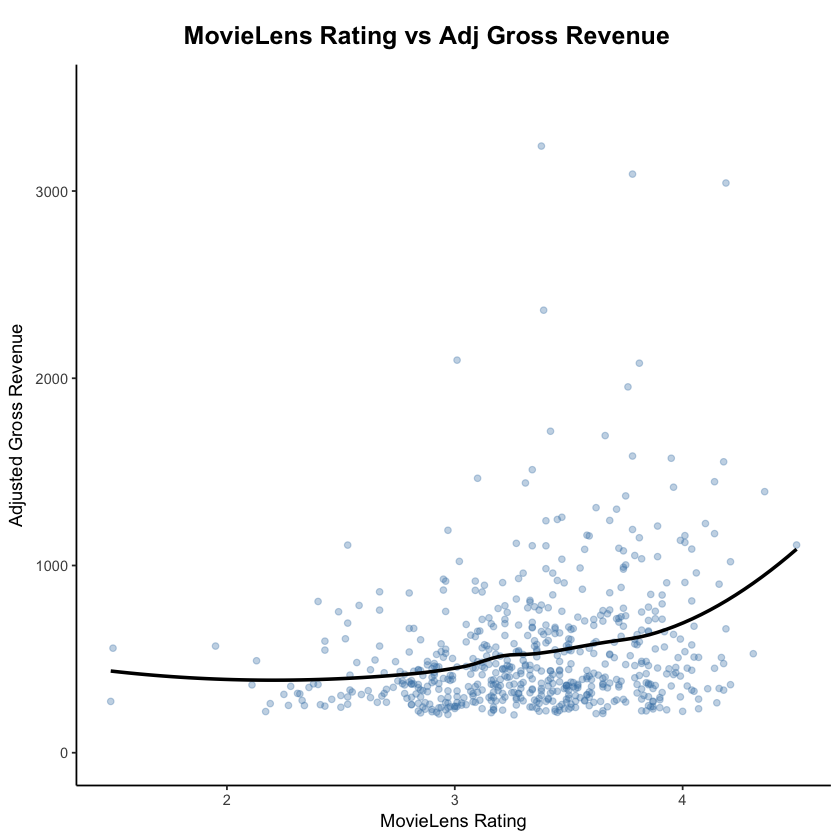

In [12]:
# Plot a scatterplot, add a trendline
# MovieLens vs Adj Gross Rev
m<- ggplot(data=movie, aes(x=MovieLens_Rating, y=Adjusted_Gross2)) + 
  geom_point(alpha=1/3,color='steel blue') + geom_smooth(fill=NA,size=1,color='black') +
  xlab("MovieLens Rating") + ylab("Adjusted Gross Revenue") +
  labs(title = "MovieLens Rating vs Adj Gross Revenue") +
  scale_x_continuous(breaks = round(seq(0,10, by = 1),1)) +
  ylim(0,3500) 

m + theme(panel.background = element_rect(fill='white'),
         plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
         axis.line = element_line(colour = "black"),
         panel.grid.major = element_blank(),
         panel.grid.minor = element_line(colour='white'),
         panel.border = element_blank())

In [13]:
# Assess the correlation
cor(movie$MovieLens_Rating,movie$Adjusted_Gross2,method="pearson")

[1] 0.2257772

In [14]:
# One way to combine them (sum)
movie$CompositeRating<-(2*movie$MovieLens_Rating)+(movie$IMDb_Rating)
head(movie$CompositeRating)

# Another way (average)
movie$CompositeRating2<-((2*movie$MovieLens_Rating)+(movie$IMDb_Rating))/2
head(movie$CompositeRating2)

[1] 13.22 12.54 11.96 14.44 15.30 11.50

[1] 6.61 6.27 5.98 7.22 7.65 5.75

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

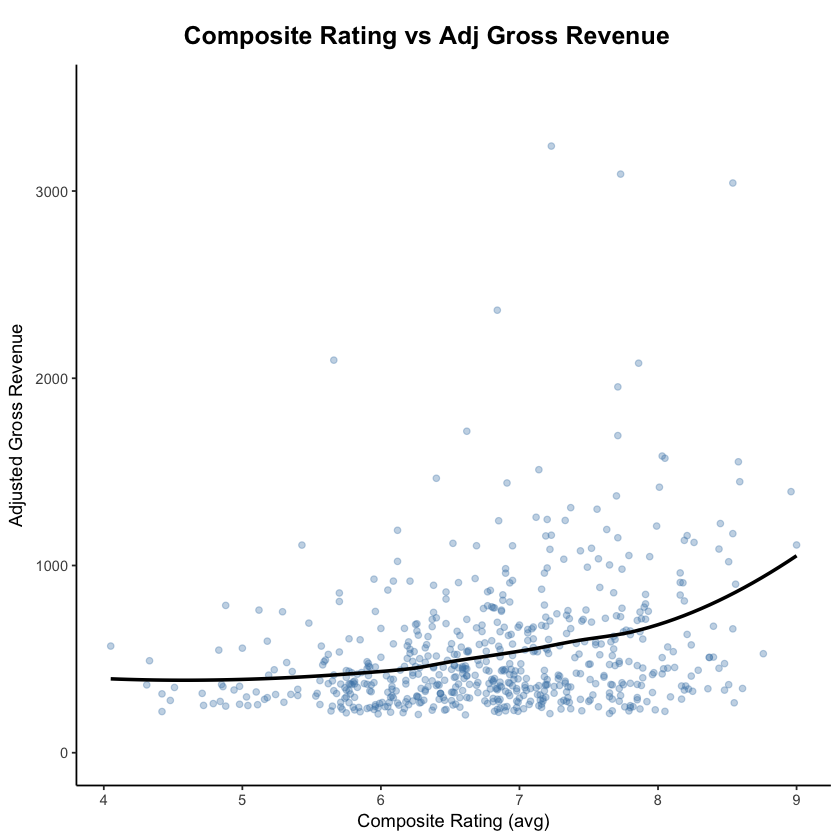

In [15]:
a<- ggplot(data=movie, aes(x=CompositeRating2, y=Adjusted_Gross2)) + 
  geom_point(alpha=1/3,color="steel blue") + geom_smooth(fill=NA,size=1,color='black') +
  xlab("Composite Rating (avg)") + ylab("Adjusted Gross Revenue") +
  labs(title = "Composite Rating vs Adj Gross Revenue") +
  scale_x_continuous(breaks = round(seq(0,10, by = 1),1)) +
  ylim(0,3500) 

a + theme(panel.background = element_rect(fill='white'),
          plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
          axis.line = element_line(colour = "black"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_line(colour='white'),
          panel.border = element_blank())

In [16]:
# Assess the correlation
cor(movie$CompositeRating2,movie$Adjusted_Gross2,method="pearson")

[1] 0.2569871

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

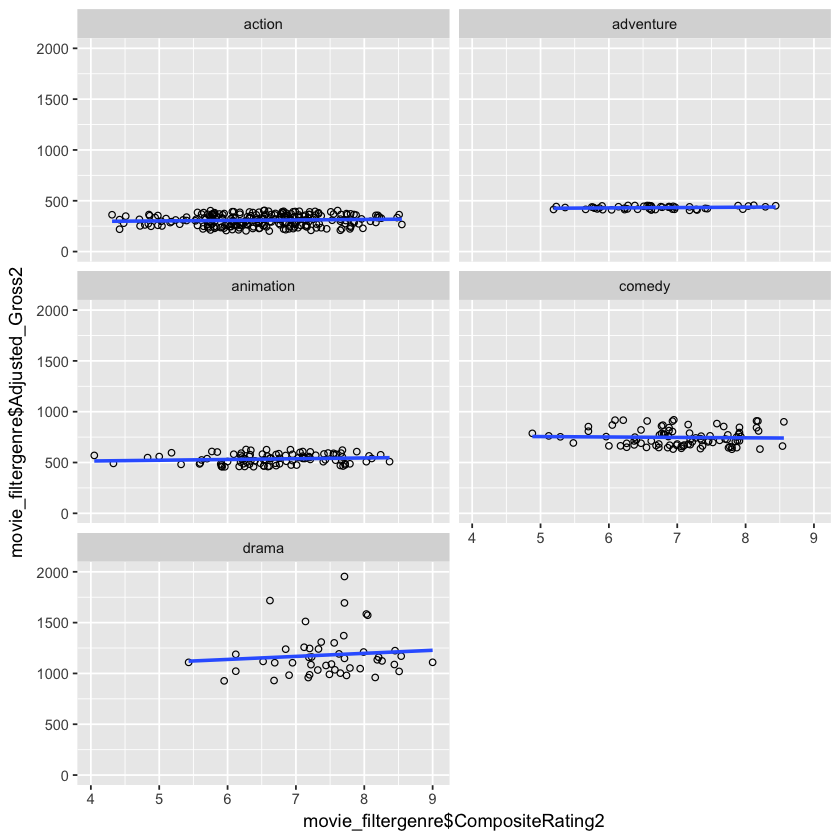

In [17]:
# Plot Top 5 Genres on one page.  DOesn't look great because the axis is the same for all, which doesn't really work for Drama (cuts off GWTW, for instance)

filtergenre<-movie$Genre %in% c("action","animation","adventure","drama","comedy")
movie_filtergenre<-movie[filtergenre,]

plot1 <- ggplot(movie_filtergenre, aes(x=movie_filtergenre$CompositeRating2, y=movie_filtergenre$Adjusted_Gross2)) + geom_point(shape=1)

plot1 + facet_wrap( ~ movie_filtergenre$Genre, ncol=2) +ylim(0,2000) + geom_smooth(method="lm",fill=NA)

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

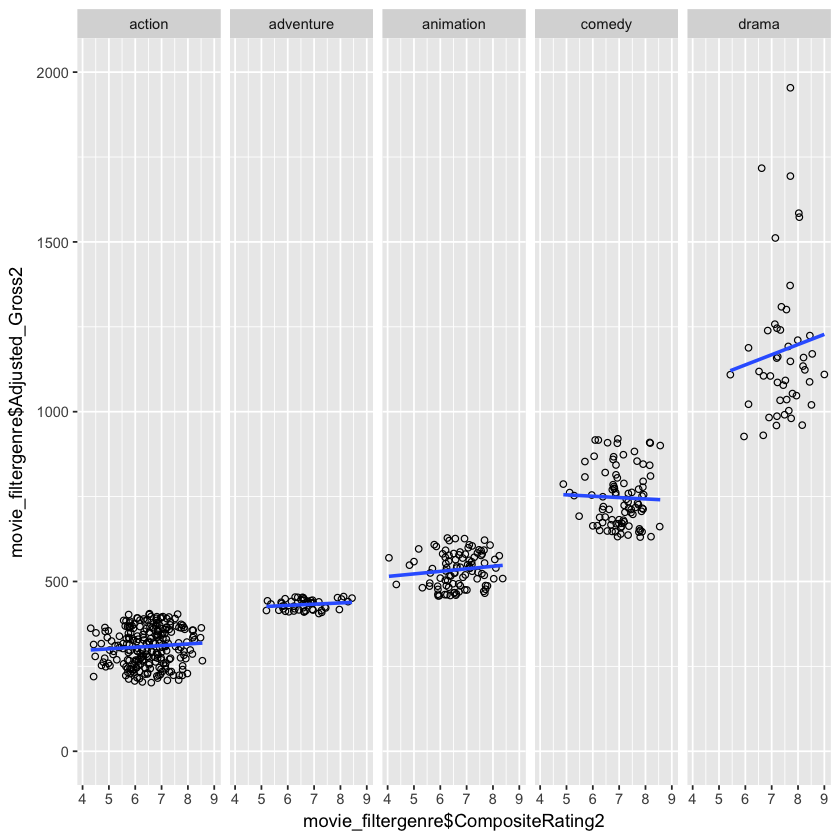

In [18]:
# Put them in one row
plot1 + facet_grid( ~ movie_filtergenre$Genre) +ylim(0,2000) + geom_smooth(method="lm",fill=NA)

In [19]:
# Check correlation for all 5 then we pick Action, Animation, Adventure to further explore
action<-subset(movie_filtergenre,movie_filtergenre[,3] == "action")
adventure<-subset(movie_filtergenre,movie_filtergenre[,3] == "adventure")
animation<-subset(movie_filtergenre,movie_filtergenre[,3] == "animation")
comedy<-subset(movie_filtergenre,movie_filtergenre[,3] == "comedy")
drama<-subset(movie_filtergenre,movie_filtergenre[,3] == "drama")

cor(action$CompositeRating2,action$Adjusted_Gross2,method="pearson")
cor(adventure$CompositeRating2,adventure$Adjusted_Gross2,method="pearson")
cor(animation$CompositeRating2,animation$Adjusted_Gross2,method="pearson")
cor(comedy$CompositeRating2,comedy$Adjusted_Gross2,method="pearson")
cor(drama$CompositeRating2,drama$Adjusted_Gross2,method="pearson")

[1] 0.4188168

[1] 0.2484471

[1] 0.3168602

[1] 0.1902837

[1] 0.1079756

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

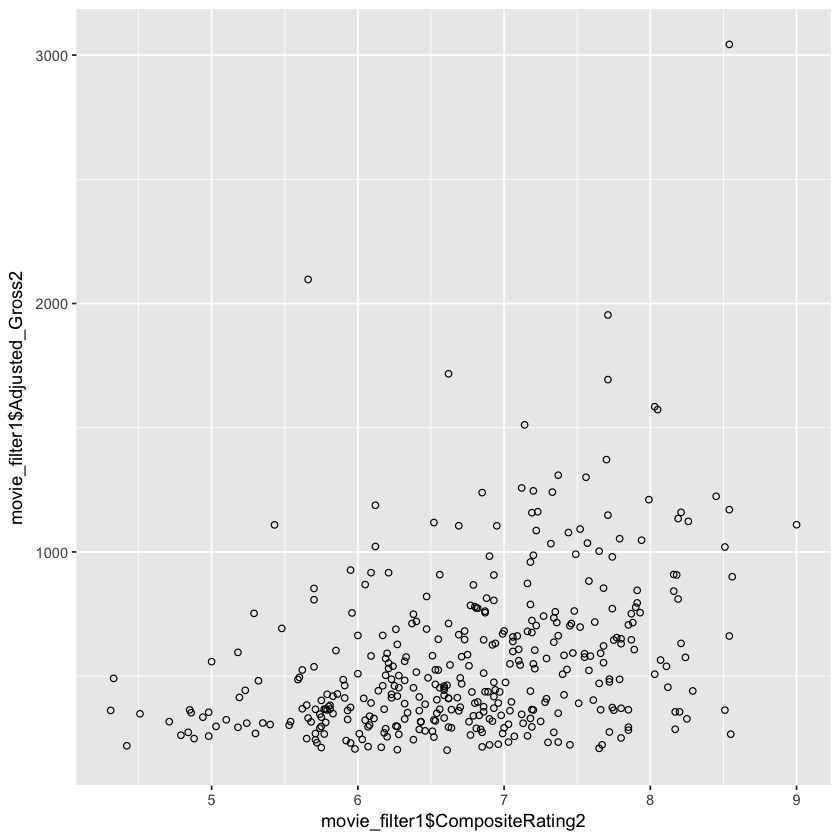

ERROR: Error in ggplotly(): could not find function "ggplotly"


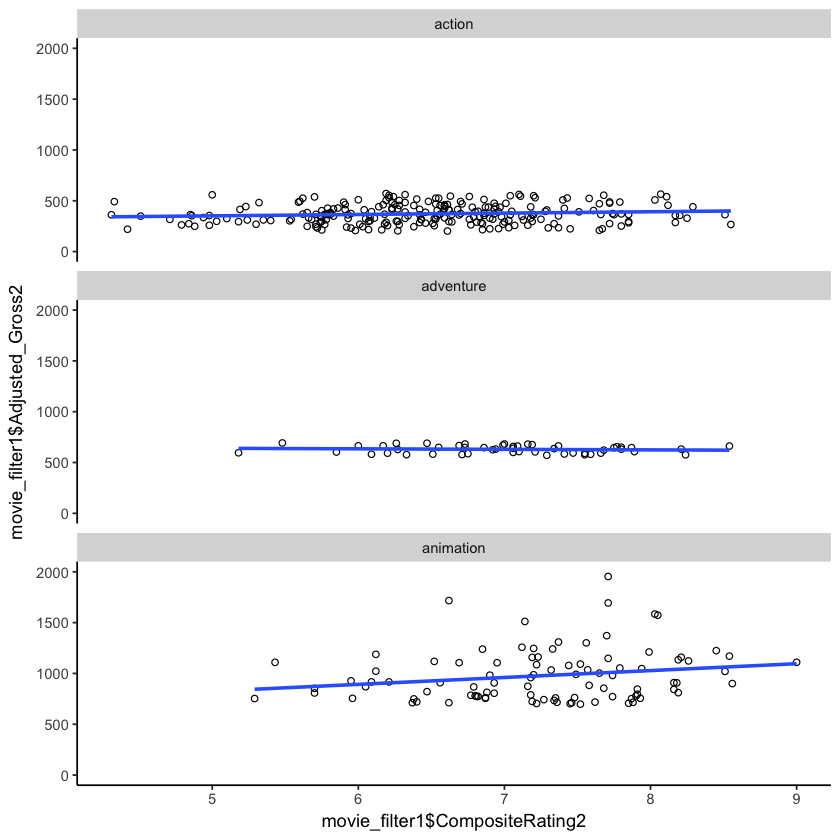

In [20]:
# Plot Action, Animation, Adventure on one page

filter1<-movie$Genre %in% c("action","animation","adventure")
movie_filter1<-movie[filter1,]

plot1 <- ggplot(movie_filter1, aes(x=movie_filter1$CompositeRating2, y=movie_filter1$Adjusted_Gross2)) + geom_point(shape=1)
plot1

plot1 + facet_wrap( ~ movie_filter1$Genre, ncol=1) +ylim(0,2000) + geom_smooth(method="lm",fill=NA) +
  theme(panel.background = element_rect(fill='white'),
          plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
          axis.line = element_line(colour = "black"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_line(colour='white'),
          panel.border = element_blank()) 

ggplotly()

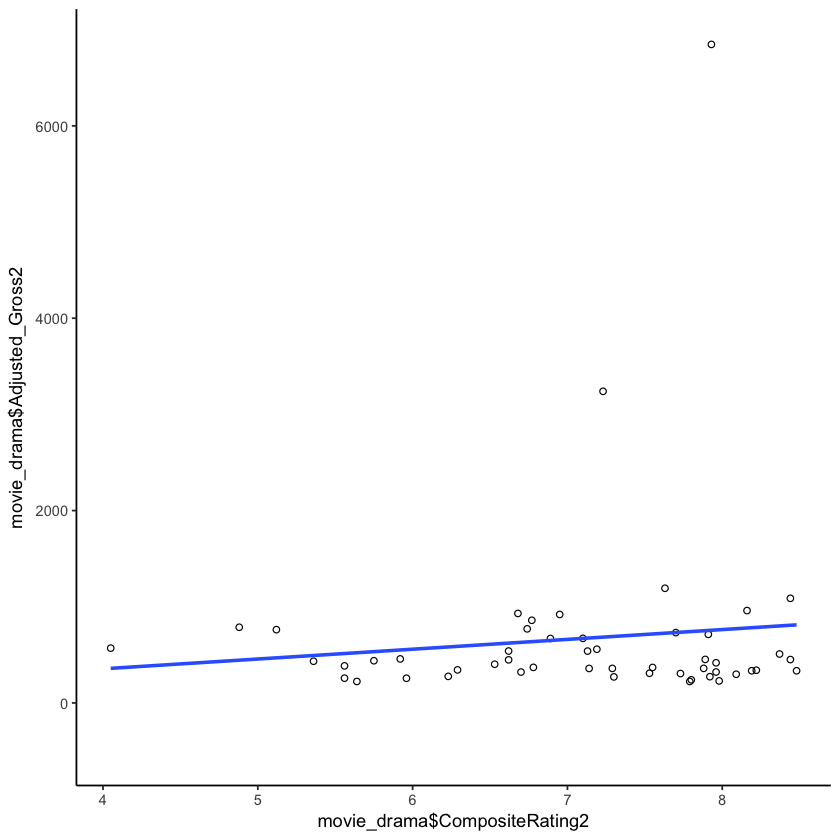

In [21]:
# Look just at drama

filter2<-movie$Genre %in% c("drama")
movie_drama<-movie[filter2,]

plotdrama <- ggplot(movie_drama, aes(x=movie_drama$CompositeRating2, y=movie_drama$Adjusted_Gross2)) + geom_point(shape=1) +
  geom_smooth(method="lm",fill=NA) +
  theme(panel.background = element_rect(fill='white'),
          plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
          axis.line = element_line(colour = "black"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_line(colour='white'),
          panel.border = element_blank()) 
plotdrama

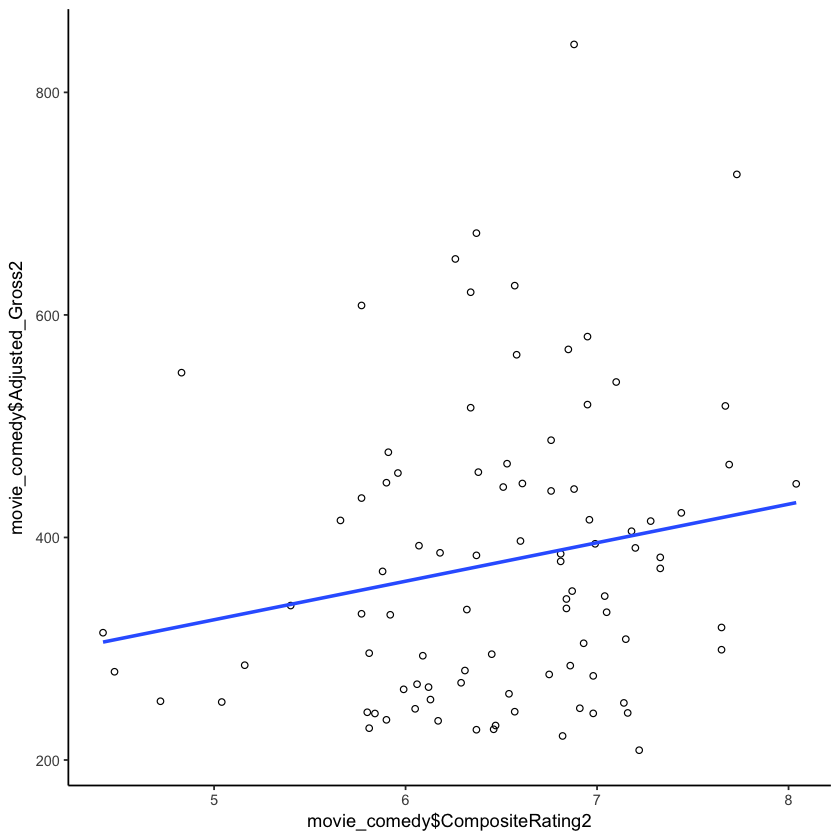

In [22]:
# Look just at comedy

filter3<-movie$Genre %in% c("comedy")
movie_comedy<-movie[filter3,]

plotcomedy <- ggplot(movie_comedy, aes(x=movie_comedy$CompositeRating2, y=movie_comedy$Adjusted_Gross2)) + geom_point(shape=1) +
  geom_smooth(method="lm",fill=NA) +
  theme(panel.background = element_rect(fill='white'),
          plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
          axis.line = element_line(colour = "black"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_line(colour='white'),
          panel.border = element_blank()) 
plotcomedy